Student - Filipe do Vale Melo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout

from sklearn.model_selection import train_test_split

Mounted at /content/drive


In [ ]:
# save filepath to variable for easier access
diabetes_file_path = '/content/drive/My Drive/Deep_Learning/data/diabetes.csv'
data = pd.read_csv(diabetes_file_path)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X = data.to_numpy()[:,0:8] 
Y = data.to_numpy()[:,8]
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = seed)
print (f'Shape of Train Data : {X_train.shape}')
print (f'Shape of Test Data : {X_test.shape}')

Shape of Train Data : (614, 8)
Shape of Test Data : (154, 8)


In [ ]:
print(Y)

[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.

# Model description
The first hidden layer has 100 neurons, the second has 50, both with a dropout of 30%.

In [ ]:
model = Sequential([
  Dense(100, activation='relu', input_dim = (8)),
  keras.layers.Dropout(0.3),
  Dense(50, activation='relu'),
  keras.layers.Dropout(0.3),
  Dense(1, activation='sigmoid'),
])

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)


model.summary()

NameError: ignored

# Model Fitting and Testing
Here we fit the model and test it in each epoch.

In [ ]:
history = model.fit(
  X_train, # training data
  y_train, # training targets
  epochs=150,
  batch_size=32, 
  validation_data = (X_test, y_test), 
  verbose = 1
)

Epoch 1/150
20/20 [==============================] - 0s 10ms/step - loss: 7.0560 - accuracy: 0.6156 - val_loss: 1.5878 - val_accuracy: 0.6623
Epoch 2/150
20/20 [==============================] - 0s 3ms/step - loss: 7.2001 - accuracy: 0.5391 - val_loss: 2.3863 - val_accuracy: 0.6623
Epoch 3/150
20/20 [==============================] - 0s 3ms/step - loss: 5.1656 - accuracy: 0.5554 - val_loss: 2.0286 - val_accuracy: 0.6558
Epoch 4/150
20/20 [==============================] - 0s 3ms/step - loss: 4.0985 - accuracy: 0.5863 - val_loss: 1.2610 - val_accuracy: 0.6558
Epoch 5/150
20/20 [==============================] - 0s 3ms/step - loss: 3.1467 - accuracy: 0.6124 - val_loss: 0.8006 - val_accuracy: 0.6558
Epoch 6/150
20/20 [==============================] - 0s 3ms/step - loss: 2.8650 - accuracy: 0.5814 - val_loss: 0.9971 - val_accuracy: 0.5909
Epoch 7/150
20/20 [==============================] - 0s 3ms/step - loss: 2.3523 - accuracy: 0.5798 - val_loss: 0.7844 - val_accuracy: 0.5909
Epoch 8/150


# Model testing
This is the training and validation losses for each epoch. The proximity of both lines is a good indicator that the model is not overfitting.

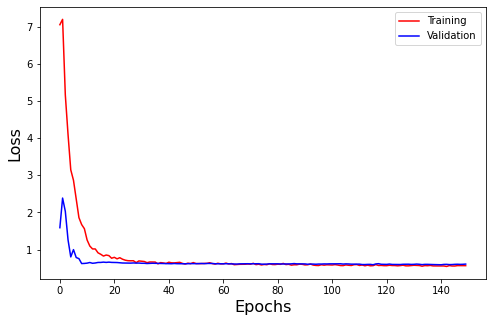

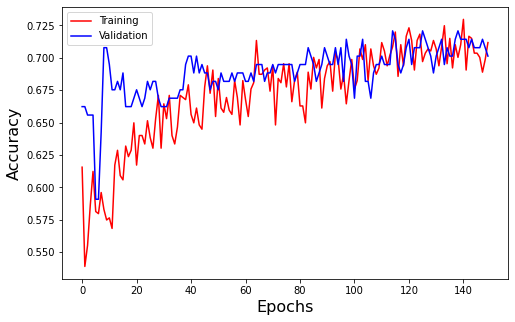

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#Epochs
epochs = range(len(val_loss))

# Plotting loss

fig1 = plt.figure(figsize=(8,5))
gs1 = fig1.add_gridspec(1, 1)
ax1 = fig1.add_subplot(gs1[0, 0])

ax1.plot(epochs, loss, 'r', label='Training')
ax1.plot(epochs, val_loss, 'b', label='Validation')
ax1.set_xlabel('Epochs', size=16)
ax1.set_ylabel('Loss', size=16)
#ax1.set_yscale('log')
ax1.legend()
plt.show()

# Plotting accuracy metric

fig2 = plt.figure(figsize=(8,5))
gs2 = fig2.add_gridspec(1, 1)
ax2 = fig2.add_subplot(gs2[0, 0])

ax2.plot(epochs, accuracy, 'r', label='Training')
ax2.plot(epochs, val_accuracy, 'b', label='Validation')
ax2.set_xlabel('Epochs', size=16)
ax2.set_ylabel('Accuracy', size=16)
#ax2.set_yscale('log')
ax2.legend()
plt.show()

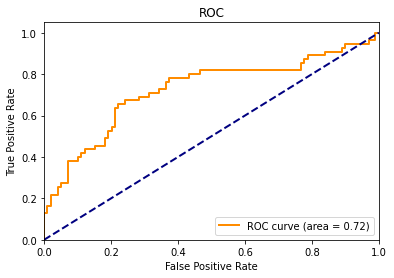

In [ ]:
y_pred  = model.predict(X_test)

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()